# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Ant Man
- Hulk
- Iron Man
- Thor
- Wasp

<a id='research_question'></a>
# Research Question

*Fill in your research question here*

<a id='background'></a>

## Background & Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import os
from pathlib import Path

# converting city to county
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm # progress bar for .apply()

# for choropleth
import plotly.express as px

# used for choropleth
from urllib.request import urlopen
import json

# filter extra noise from warnings
import warnings
warnings.filterwarnings('ignore')

# Statmodels & patsy
import patsy
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import boxcox

# Make plots just slightly bigger for displaying well in notebook
plt.rcParams['figure.figsize'] = (10, 5)

# Displaying figures as image
from IPython.display import Image

# used to convert state/county to fips
import addfips

%config InlineBackend.figure_format ='retina'

In [289]:
#import housing dataset
housing_df = pd.read_csv("C:\\Users\\wrbl6\\Desktop\\NewHousingPrices2017-2021.csv")
housing_df.head()

,Unnamed: 0,County & State,FIPS,2017,2018,2019,2020,2021
0,0,"Autauga County, Alabama",1001,145203,144361,153716,160972,166318
1,1,"Baldwin County, Alabama",1003,185313,205764,209494,232730,243643
2,2,"Barbour County, Alabama",1005,97533,91965,100423,94615,99052
3,3,"Bibb County, Alabama",1007,116052,110683,101799,97807,102324
4,4,"Blount County, Alabama",1009,135375,128203,131548,134696,140916


In [259]:
#import disaster dataset
disaster_type_df = pd.read_csv('C:\\Users\\wrbl6\\Desktop\\COGS 108 Project\\Group013-Wi22-master\\datasets\\DisasterDeclarationsSummaries.csv')
disaster_type_df.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,hash,lastRefresh,id
0,DR-7-MA,7,MA,DR,1953-06-11T00:00:00.000Z,1953,Tornado,TORNADO,0,1,...,1953-06-11T00:00:00.000Z,1956-06-01T00:00:00.000Z,25,0,0,Statewide,53009,9ef08cfe2ef1a86b8e6a3ec802cafc37c223edf8,2021-07-13T23:01:19.145Z,60c3b7a9a0ee349d71025720
1,DR-6-MI,6,MI,DR,1953-06-09T00:00:00.000Z,1953,Tornado,TORNADO,0,1,...,1953-06-09T00:00:00.000Z,1956-03-30T00:00:00.000Z,26,0,0,Statewide,53007,fd3377e42a13e063a569a9b6fc25872dbeeaf099,2021-07-13T23:01:19.145Z,60c3b7a9a0ee349d71025766
2,DR-2-TX,2,TX,DR,1953-05-15T00:00:00.000Z,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,...,1953-05-15T00:00:00.000Z,1958-01-01T00:00:00.000Z,48,0,0,Statewide,53003,c879557e78d059e6847e7688388c339d10f51979,2021-07-13T23:01:19.145Z,60c3b7a9a0ee349d71025783
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00.000Z,1953,Tornado,TORNADO,0,1,...,1953-06-02T00:00:00.000Z,1956-02-01T00:00:00.000Z,26,0,0,Statewide,53004,87a0c1dd5da249767f545e0c0a43f917e4e9ca83,2021-07-13T23:01:19.145Z,60c3b7a9a0ee349d7102577a
4,DR-1-GA,1,GA,DR,1953-05-02T00:00:00.000Z,1953,Tornado,TORNADO,0,1,...,1953-05-02T00:00:00.000Z,1954-06-01T00:00:00.000Z,13,0,0,Statewide,53013,bb121323c9c29d3bef0c9a3f134bfd8b5ecff148,2021-07-13T23:01:19.144Z,60c3b7a9a0ee349d71025780


# Data Cleaning

Describe your data cleaning steps here.

In [290]:
#Calculates mean of quarters for each year of housing price through 2017-2021
housing_df['Average_HP'] = housing_df.iloc[:,4:].mean(axis=1)
new_cols = ['County & State','FIPS','Average_HP']
housing_df = housing_df.reindex(columns=new_cols)

#Add the leading zeros back in to FIPS
housing_df['FIPS'] = housing_df['FIPS'].apply(lambda x: str(x))
housing_df['FIPS'] = housing_df['FIPS'].apply(lambda x: x.zfill(5))

#make the name lower case to match other dataset
housing_df = housing_df.rename(columns={'FIPS' : 'fips'})
housing_df.head()

,County & State,fips,Average_HP
0,"Autauga County, Alabama",01001,156341.75
1,"Baldwin County, Alabama",01003,222907.75
2,"Barbour County, Alabama",01005,96513.75
3,"Bibb County, Alabama",01007,103153.25
4,"Blount County, Alabama",01009,133840.75


In [291]:
def standardize_county(str_in):
    try:
        if '(County)' in str_in:
            output = str_in.replace('(County)','')
        elif '(Borough)' in str_in:
            output = str_in.replace('(Borough)','')
        elif '(Census Subarea)'in str_in:
            output = str_in.replace('(Census Subarea)','')
        elif '(Parish)'in str_in:
            output = str_in.replace('(Parish)','')
        else:
            output = None
    except: 
        output = None

    return output


def standardize_year(str_in):
    try:
        output = str_in.split('T')[0]
        output = pd.to_datetime(str_in).year
    except:
        output = None
        
    return output

In [292]:
disaster_type_df = pd.read_csv('C:\\Users\\wrbl6\\Desktop\\COGS 108 Project\\Group013-Wi22-master\\datasets\\DisasterDeclarationsSummaries.csv')

# select a subset of the columns
wanted_columns = ['state', 'declarationDate','incidentType','declarationTitle','designatedArea']

# rename the columns
disaster_type_df = disaster_type_df[wanted_columns].rename(columns={"declarationDate":"year", "designatedArea": "county", "incidentType":"disaster_type", "declarationTitle":"disaster_declaration"})

# Set "Statewide" to None and strip "(County)" from all counties
disaster_type_df['county'] = disaster_type_df['county'].apply(standardize_county)

# filter dataset to only include non-null 
disaster_type_df = disaster_type_df[~disaster_type_df['county'].isnull()]

# strip year column to only include year
disaster_type_df['year'] = disaster_type_df['year'].apply(standardize_year)

# sort by year
disaster_type_df = disaster_type_df.sort_values('year').reset_index(drop = True)

# check for no NaNs
assert(disaster_type_df.isna().sum().sum() == 0)



disaster_type_df

,state,year,disaster_type,disaster_declaration,county
0,IN,1959,Flood,FLOOD,Clay
1,WA,1964,Flood,HEAVY RAINS & FLOODING,Wahkiakum
2,WA,1964,Flood,HEAVY RAINS & FLOODING,Skamania
3,WA,1964,Flood,HEAVY RAINS & FLOODING,Pierce
4,WA,1964,Flood,HEAVY RAINS & FLOODING,Pacific
...,...,...,...,...,...
57602,MO,2022,Severe Storm(s),"SEVERE STORMS, STRAIGHT-LINE WINDS, AND TORNADOES",Dunklin
57603,TN,2022,Tornado,"SEVERE STORMS, STRAIGHT-LINE WINDS, AND TORNADOES",Dyer
57604,WA,2022,Flood,"SEVERE STORMS, STRAIGHT-LINE WINDS, FLOODING, ...",Whatcom
57605,TN,2022,Tornado,"SEVERE STORMS, STRAIGHT-LINE WINDS, AND TORNADOES",Henderson


In [293]:
#a dictinary for translating state abbrevs to the state whole name
state_abv = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AZ': 'Arizona','CA': 'California','CO': 'Colorado',
             'CT': 'Connecticut','DE': 'Delaware','FL': 'Florida','GA': 'Georgia','HI': 'Hawaii','IA': 'Iowa',
             'ID': 'Idaho','IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana',
             'MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota',
             'MO': 'Missouri','MS': 'Mississippi','MT': 'Montana','NC': 'North Carolina','ND': 'North Dakota',
             'NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada',
             'NY': 'New York','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon','PA': 'Pennsylvania',
            'RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee',
             'TX': 'Texas','UT': 'Utah','VA': 'Virginia','VT': 'Vermont','WA': 'Washington',
             'WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'
                    }
#setting the state name from abv
disaster_type_df['state'] = disaster_type_df['state'].map(state_abv)

#we want to remove man made disasters from the dataset
values = ['Biological', 'Human Cause', 'Fishing Losses', 'Terrorist', 'Other','Dam/Levee Break', 'Toxic Substances']
disaster_type_df = disaster_type_df[~(disaster_type_df['disaster_type'].isin(values))]
disaster_type_df['disaster_type'].unique()

#we only want the years after 2017 to match our housing price data
dfrq_df = disaster_type_df[disaster_type_df['year'] >= 2017].reset_index(drop=True)

In [294]:
af = addfips.AddFIPS()
def find_fips(x):
    county = x['county'].strip()
    state = x['state'].strip()
    fips = af.get_county_fips(county,state=state)
    return str(fips)

tqdm.pandas()
dfrq_df['fips'] = dfrq_df.progress_apply(find_fips,axis=1)

dfrq_df

100%|███████████████████████████████████████████████████████████████████████████| 7584/7584 [00:00<00:00, 69600.38it/s]


,state,year,disaster_type,disaster_declaration,county,fips
0,Georgia,2017,Hurricane,HURRICANE IRMA,Laurens,13175
1,Georgia,2017,Hurricane,HURRICANE IRMA,Long,13183
2,Georgia,2017,Hurricane,HURRICANE IRMA,Oconee,13219
3,Georgia,2017,Hurricane,HURRICANE IRMA,Oglethorpe,13221
4,Georgia,2017,Hurricane,HURRICANE IRMA,Peach,13225
...,...,...,...,...,...,...
7579,Missouri,2022,Severe Storm(s),"SEVERE STORMS, STRAIGHT-LINE WINDS, AND TORNADOES",Dunklin,29069
7580,Tennessee,2022,Tornado,"SEVERE STORMS, STRAIGHT-LINE WINDS, AND TORNADOES",Dyer,47045
7581,Washington,2022,Flood,"SEVERE STORMS, STRAIGHT-LINE WINDS, FLOODING, ...",Whatcom,53073
7582,Tennessee,2022,Tornado,"SEVERE STORMS, STRAIGHT-LINE WINDS, AND TORNADOES",Henderson,47077


In [295]:
#instead of unique description for each disaster we want a mean for each county over the 5 years.
df_dcount = dfrq_df[['fips']].value_counts().to_frame()
df_dcount = df_dcount.rename(columns={0 : 'disaster_count'})
df_dcount['disaster_count']= df_dcount['disaster_count']/5

df_dcount.head()

,disaster_count
fips,
None,9.0
22007,4.0
22101,3.8
22045,3.6
22113,3.6


In [296]:
def standardize_long(location):
    try:
        output = location.longitude
    except:
        output = None
    return output
def standardize_lat(location):
    try:
        output = location.latitude
    except:
        output = None
    return output


In [297]:
dfrq_df['county_state'] = dfrq_df['county']+", " +dfrq_df['state']
geolocator = Nominatim(user_agent='find_long_lat')
geocode = RateLimiter(geolocator.geocode,min_delay_seconds=1)
tqdm.pandas()
try:
    dfrq_df['geocode'] = dfrq_df['county_state'].progress_apply(geocode)
except:
    pass

  0%|                                                                               | 4/7584 [00:03<1:35:47,  1.32it/s]


In [298]:
dfrq_df = pd.read_csv('C:\\Users\\wrbl6\\Desktop\\COGS 108 Project//Group013-Wi22-master\\datasets\\disaster_freq_bubblemap.csv', encoding = 'latin1', index_col = 0)
dfrq_df

,state,year,disaster_type,disaster_declaration,county,fips,county_state,geocode,long,lat
0,Georgia,2017,Hurricane,HURRICANE IRMA,Laurens County,13175,"Laurens County, Georgia","Laurens County, Georgia, United States",-82.938894,32.423997
1,Georgia,2017,Hurricane,HURRICANE IRMA,Long County,13183,"Long County, Georgia","Long County, Georgia, 31316, United States",-81.753725,31.770490
2,Georgia,2017,Hurricane,HURRICANE IRMA,Oconee County,13219,"Oconee County, Georgia","Oconee County, Georgia, United States",-83.427592,33.829579
3,Georgia,2017,Hurricane,HURRICANE IRMA,Oglethorpe County,13221,"Oglethorpe County, Georgia","Oglethorpe County, Georgia, United States",-83.104938,33.870268
4,Georgia,2017,Hurricane,HURRICANE IRMA,Peach County,13225,"Peach County, Georgia","Peach County, Georgia, United States",-83.835073,32.554346
...,...,...,...,...,...,...,...,...,...,...
6624,Connecticut,2021,Hurricane,TROPICAL STORM ISAIAS,New London County,09011,"New London County, Connecticut","New London County, Connecticut, United States",-72.123767,41.491501
6637,Connecticut,2021,Hurricane,TROPICAL STORM ISAIAS,Litchfield County,09005,"Litchfield County, Connecticut","Litchfield County, Connecticut, United States",-73.254305,41.767249
6646,Connecticut,2021,Hurricane,TROPICAL STORM ISAIAS,New Haven County,09009,"New Haven County, Connecticut","New Haven County, Connecticut, United States",-72.933028,41.408200
7360,Connecticut,2021,Hurricane,TROPICAL STORM ISAIAS,Hartford County,09003,"Hartford County, Connecticut","Hartford County, Connecticut, United States",-72.722324,41.792348


In [301]:
hp_df = pd.read_csv('C:\\Users\\wrbl6\\Desktop\\COGS 108 Project\\Group013-Wi22-master\\NewHousingPrices2017-2021.csv').drop(columns=['Unnamed: 0'])
hp_df[['county', 'state']] = hp_df['County & State'].str.split('County,', expand=True)
old_cols = hp_df.columns.values
hp_df['Average_HP'] = hp_df.iloc[:,3:].mean(axis=1)
new_cols = ['county','state','FIPS','Average_HP']
hp_df = hp_df.reindex(columns=new_cols)
print(hp_df.to_string())

                                           county             state   FIPS  Average_HP
0                                        Autauga            Alabama   1001   156341.75
1                                        Baldwin            Alabama   1003   222907.75
2                                        Barbour            Alabama   1005    96513.75
3                                           Bibb            Alabama   1007   103153.25
4                                         Blount            Alabama   1009   133840.75
5                                        Bullock            Alabama   1011    75669.25
6                                         Butler            Alabama   1013    97917.25
7                                        Calhoun            Alabama   1015   129083.00
8                                       Chambers            Alabama   1017    97967.50
9                                       Cherokee            Alabama   1019   129082.25
10                                       Ch

In [302]:
#We only want to look at the mean total disasters from the 5 years 
df_dcount = dfrq_df[['fips']].value_counts().to_frame()
df_dcount = df_dcount.rename(columns={0 : 'disaster_count'})
df_dcount['disaster_count']= df_dcount['disaster_count']/5
df_dcount['disaster_count'] = df_dcount['disaster_count'].astype(str)

print(df_dcount.to_string())


      disaster_count
fips                
22007            4.0
22101            3.8
22045            3.6
22109            3.6
22099            3.6
22057            3.6
22113            3.6
22047            3.6
22079            3.4
22125            3.4
22055            3.4
22063            3.4
22075            3.4
22077            3.4
22071            3.4
22023            3.4
22019            3.4
22003            3.4
22089            3.4
22087            3.2
22091            3.2
22095            3.2
22097            3.2
22051            3.2
22105            3.2
22053            3.2
22005            3.2
22011            3.2
22033            3.2
22001            3.2
22025            3.0
22037            3.0
22115            3.0
22103            3.0
22093            3.0
06037            3.0
22117            3.0
22029            3.0
22085            2.8
22069            2.8
22073            2.8
22121            2.8
22039            2.8
06055            2.6
22021            2.6
22111        

In [303]:
#Need to typecast the fips to string in housing data
housing_df['fips'] = housing_df['fips'].astype(str)
#Merging the housing price data with the disaster count!
merged_df =  pd.merge(df_dcount,housing_df,  on ='fips',how='right')
#For the counties that have no disasters set NaN to 0
merged_df['disaster_count'] = merged_df['disaster_count'].fillna(0)
merged_df = merged_df
print(merged_df.to_string())

       fips disaster_count                               County & State  Average_HP
0     01001            1.0                     Autauga County,  Alabama   156341.75
1     01003            1.2                     Baldwin County,  Alabama   222907.75
2     01005            1.2                     Barbour County,  Alabama    96513.75
3     01007            0.8                        Bibb County,  Alabama   103153.25
4     01009            1.0                      Blount County,  Alabama   133840.75
5     01011            0.8                     Bullock County,  Alabama    75669.25
6     01013            1.4                      Butler County,  Alabama    97917.25
7     01015            1.0                     Calhoun County,  Alabama   129083.00
8     01017            0.6                    Chambers County,  Alabama    97967.50
9     01019            0.8                    Cherokee County,  Alabama   129082.25
10    01021            1.0                     Chilton County,  Alabama   11

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [282]:
import plotly.graph_objects as go

import pandas as pd

In [283]:
bm = pd.read_csv('C:\\Users\\wrbl6\\Desktop\\COGS 108 Project\\Group013-Wi22-master\\datasets\\disaster_freq_bubblemap.csv')
fig = px.scatter_geo(bm,lat='lat',lon='long',hover_name='county_state',animation_frame='year',
                     projection='albers usa',hover_data=['disaster_type'],color='disaster_type')
fig.show()

In [330]:
merged_df.head()

,fips,disaster_count,County & State,Average_HP
0,01001,1.0,"Autauga County, Alabama",156341.75
1,01003,1.2,"Baldwin County, Alabama",222907.75
2,01005,1.2,"Barbour County, Alabama",96513.75
3,01007,0.8,"Bibb County, Alabama",103153.25
4,01009,1.0,"Blount County, Alabama",133840.75


AttributeError: 'Series' object has no attribute 'lineplot'

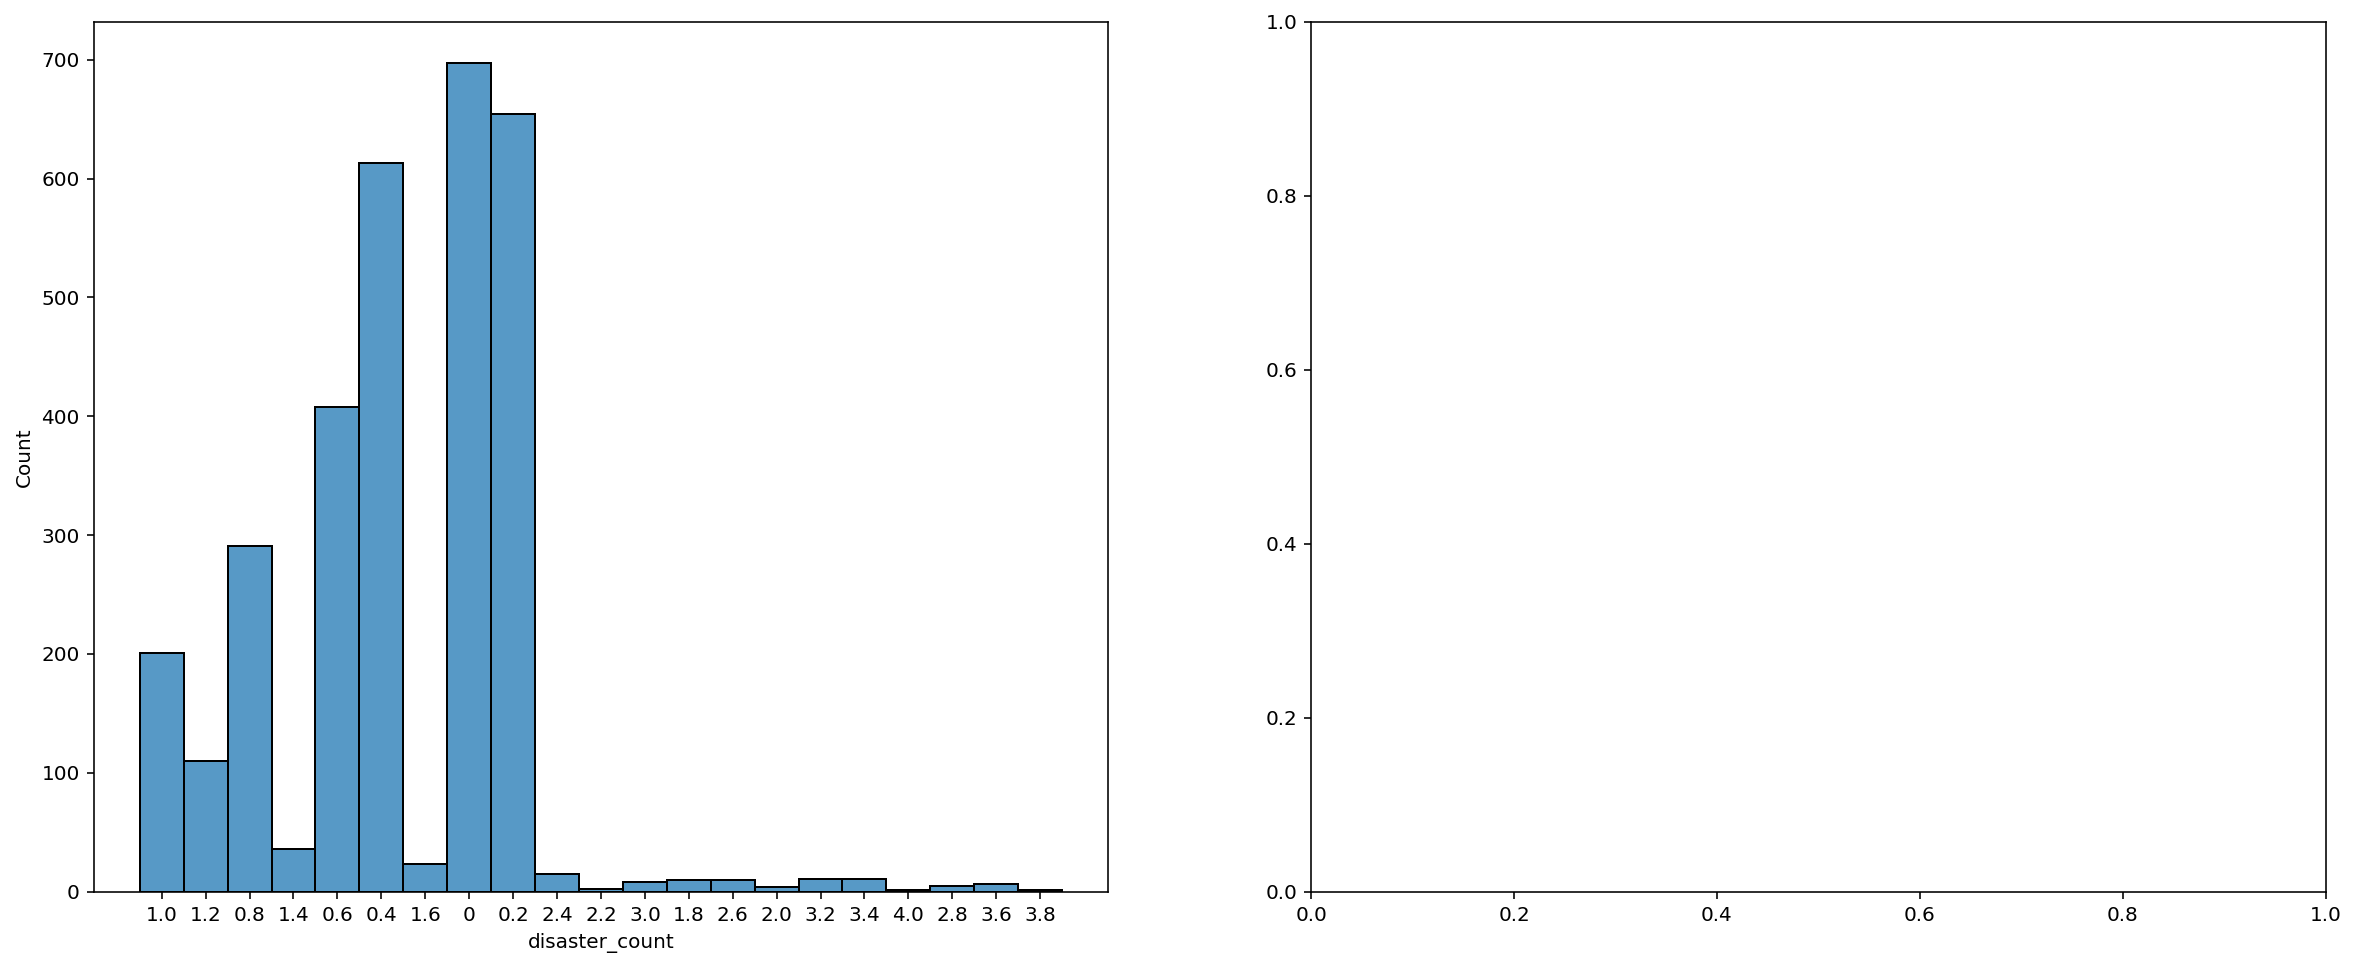

In [335]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))

sns.histplot(x=merged_df['disaster_count'].astype(str), ax = ax1,data=merged_df)
merged_df['Average_HP'].lineplot()

In [318]:
#sns.scatterplot(x = merged_df['disaster_count'].astype(str), y = merged_df['Average_HP'].astype(str), data = merged_df)

In [323]:
outcome, predictors = patsy.dmatrices('merged_df['disaster_count'].astype(str) ~ merged_df['Average_HP'].astype(str)', merged_df)

mod_log = sm.OLS(outcome, predictors)
res_log = mod_log.fit()
print(res_log.summary())

SyntaxError: invalid syntax (Temp/ipykernel_6484/3287940339.py, line 1)

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*